# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import time
import datetime
import json
import requests
from scipy.stats import linregress

#Import api key
from api_keys import weather_api_key

#Import Citipy
from citipy import citipy

output = "output_data/cities.csv"

latitude = (-90, 90)
longitude = (-180, 180)

## Generate Cities List

In [2]:
lat_lngs = []
cities = []

lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    if city not in cities:
        cities.append(city)

print(len(cities))


624


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
url = "http://api.openweathermap.org/data/2.5/weather?"
query_url = url + "appid=" + weather_api_key + '&units=imperial' + "&q=" + city


city_name = []
cloudiness = []
country = []
date = []
lng = []
lat = []
humidity = []
max_temp = []
windspeed = []
record = 0


for city in cities:
    record += 1
    url = "http://api.openweathermap.org/data/2.5/weather?"
    query_url = url + "appid=" + weather_api_key + '&units=imperial' + "&q=" + city
    response = requests.get(query_url)
    city_json = response.json()
    if (str(response) == '<Response [200]>'):
        print(f'Processing Record {record}: {city}')
        city_name.append(city_json['name'])
        country.append(city_json['sys']['country'])
        cloudiness.append(city_json['clouds']['all'])
        date.append(city_json['dt'])
        humidity.append(city_json['main']['humidity'])
        lat.append(city_json['coord']['lat'])
        lng.append(city_json['coord']['lon'])
        max_temp.append(city_json['main']['temp_max'])
        windspeed.append(city_json['wind']['speed'])
    else:
        print('City not found. Skipping...')

    time.sleep(1)

w_dict = {'City':city_name,
                'Country':country,
                'Date':date,
                'Latitude':lat,
                'Longitude':lng,
                'Cloudiness (%)':cloudiness,
                'Humidity (%)':humidity,
                'Max Temp (F)':max_temp,
                'Wind Speed (mph)':windspeed}

weather_df = pd.DataFrame(w_dict)

Processing Record 1: port elizabeth
Processing Record 2: bethel
Processing Record 3: bluff
Processing Record 4: saldanha
Processing Record 5: pokhara
Processing Record 6: richards bay
City not found. Skipping...
Processing Record 8: mataura
Processing Record 9: stade
Processing Record 10: punta arenas
Processing Record 11: rikitea
Processing Record 12: hobart
Processing Record 13: olga
Processing Record 14: teya
Processing Record 15: kavieng
Processing Record 16: ushuaia
Processing Record 17: roma
Processing Record 18: san gabriel
City not found. Skipping...
Processing Record 20: arraial do cabo
Processing Record 21: uray
Processing Record 22: burnie
Processing Record 23: albany
Processing Record 24: hun
Processing Record 25: fortuna
Processing Record 26: abu samrah
Processing Record 27: dire dawa
Processing Record 28: dikson
Processing Record 29: vaini
Processing Record 30: east london
Processing Record 31: hilo
Processing Record 32: san quintin
Processing Record 33: hirara
City not f

Processing Record 263: aguilas
City not found. Skipping...
Processing Record 265: talpa
Processing Record 266: qeshm
Processing Record 267: manaus
Processing Record 268: balabac
Processing Record 269: kavaratti
Processing Record 270: hokitika
Processing Record 271: isangel
Processing Record 272: palmer
Processing Record 273: srednekolymsk
Processing Record 274: ipora
Processing Record 275: alta floresta
Processing Record 276: fukue
Processing Record 277: shelburne
City not found. Skipping...
City not found. Skipping...
Processing Record 280: anadyr
Processing Record 281: druzhba
Processing Record 282: bac lieu
City not found. Skipping...
Processing Record 284: danane
City not found. Skipping...
Processing Record 286: gubbi
Processing Record 287: lusambo
Processing Record 288: chokurdakh
Processing Record 289: belmonte
Processing Record 290: guarapari
Processing Record 291: pevek
Processing Record 292: bogandinskiy
City not found. Skipping...
Processing Record 294: tokur
Processing Reco

City not found. Skipping...
Processing Record 522: blackwater
Processing Record 523: sergeyevka
Processing Record 524: damavand
Processing Record 525: lensk
Processing Record 526: puebloviejo
Processing Record 527: cascais
Processing Record 528: gramada
Processing Record 529: ossora
Processing Record 530: saint-augustin
City not found. Skipping...
Processing Record 532: rameswaram
Processing Record 533: wakkanai
Processing Record 534: bandarbeyla
Processing Record 535: varkaus
Processing Record 536: faanui
Processing Record 537: xiangxiang
Processing Record 538: tottori
Processing Record 539: kongoussi
Processing Record 540: khilok
Processing Record 541: fonte boa
Processing Record 542: tromso
City not found. Skipping...
Processing Record 544: houma
Processing Record 545: vyshchetarasivka
Processing Record 546: nosy varika
Processing Record 547: kindu
Processing Record 548: ust-nera
Processing Record 549: berlevag
Processing Record 550: salina cruz
Processing Record 551: palizada
City 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
weather_df.count()

City                574
Country             574
Date                574
Latitude            574
Longitude           574
Cloudiness (%)      574
Humidity (%)        574
Max Temp (F)        574
Wind Speed (mph)    574
dtype: int64

In [5]:
weather_df.head(10)


,City,Country,Date,Latitude,Longitude,Cloudiness (%),Humidity (%),Max Temp (F),Wind Speed (mph)
0,Port Elizabeth,ZA,1601529996,-33.92,25.57,75,87,59.00,11.41
1,Bethel,US,1601530283,41.37,-73.41,1,63,60.80,9.17
2,Bluff,NZ,1601530284,-46.60,168.33,84,56,60.01,4.00
3,Saldanha,ZA,1601530286,-33.01,17.94,7,71,51.80,14.99
4,Pokhara,NP,1601530287,28.23,83.98,3,62,82.00,5.79
5,Richards Bay,ZA,1601530225,-28.78,32.04,0,67,73.22,10.45
6,Mataura,NZ,1601530291,-46.19,168.86,85,56,60.01,4.00
7,Stade,DE,1601530292,53.60,9.48,19,93,53.01,3.36
8,Punta Arenas,CL,1601530294,-53.15,-70.92,20,86,28.40,12.75
9,Rikitea,PF,1601530296,-23.12,-134.97,73,81,72.95,25.48


In [6]:
weather_df.to_csv("weather_df.csv")

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

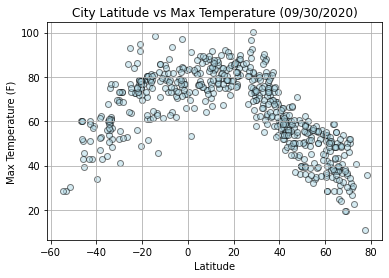

In [7]:
today = time.strftime("%m/%d/%Y")
plt.scatter(pd.to_numeric(weather_df["Latitude"]).astype(float), pd.to_numeric(weather_df["Max Temp (F)"]).astype(float), facecolors="lightblue", edgecolors="black", alpha = 0.5)
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title(f"City Latitude vs Max Temperature ({today})")
plt.grid()

## Latitude vs. Humidity Plot

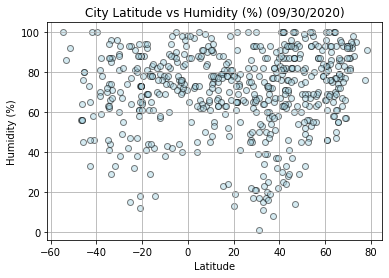

In [8]:
today = time.strftime("%m/%d/%Y")
plt.scatter(pd.to_numeric(weather_df["Latitude"]).astype(float), pd.to_numeric(weather_df["Humidity (%)"]).astype(float), facecolors="lightblue", edgecolors="black", alpha = 0.5)
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title(f"City Latitude vs Humidity (%) ({today})")
plt.grid()

## Latitude vs. Cloudiness Plot

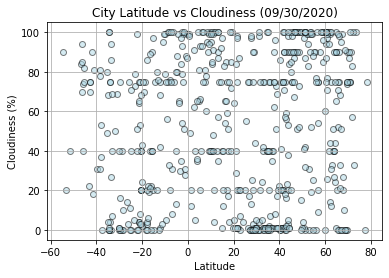

In [9]:
today = time.strftime("%m/%d/%Y")
plt.scatter(pd.to_numeric(weather_df["Latitude"]).astype(float), pd.to_numeric(weather_df["Cloudiness (%)"]).astype(float), facecolors="lightblue", edgecolors="black", alpha = 0.5)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title(f"City Latitude vs Cloudiness ({today})")
plt.grid()


## Latitude vs. Wind Speed Plot

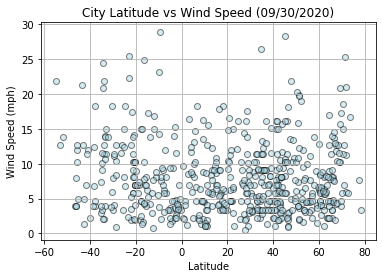

In [10]:
today = time.strftime("%m/%d/%Y")
plt.scatter(pd.to_numeric(weather_df["Latitude"]).astype(float), pd.to_numeric(weather_df["Wind Speed (mph)"]).astype(float), facecolors="lightblue", edgecolors="black", alpha = 0.5)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title(f"City Latitude vs Wind Speed ({today})")
plt.grid()


## Linear Regression

In [11]:
northern_df = weather_df.loc[pd.to_numeric(weather_df["Latitude"]).astype(float) > 0, :]
southern_df = weather_df.loc[pd.to_numeric(weather_df["Latitude"]).astype(float) < 0, :]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

Regression line equation is: y = -0.77x + 92.49


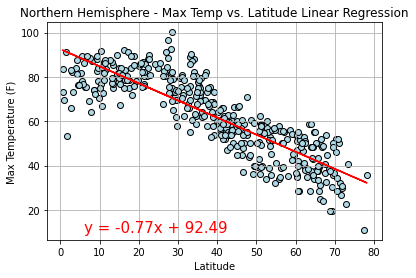

In [12]:
x_values = pd.to_numeric(northern_df['Latitude']).astype(float)
y_values = pd.to_numeric(northern_df['Max Temp (F)']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values, facecolors="lightblue", edgecolors="black")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('Northern Hemisphere - Max Temp vs. Latitude Linear Regression')
plt.grid()


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

Regression line equation is: y = 0.71x + 84.3
The r-squared is: 0.686555858835473


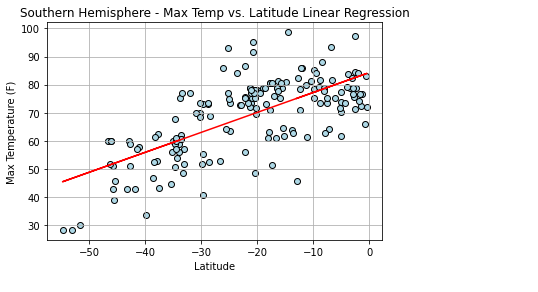

In [13]:
x_values = pd.to_numeric(southern_df['Latitude']).astype(float)
y_values = pd.to_numeric(southern_df['Max Temp (F)']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values, facecolors="lightblue", edgecolors="black")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('Southern Hemisphere - Max Temp vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
plt.grid()



####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

Regression line equation is: y = 0.16x + 64.41
The r-squared is: 0.14878276738666754


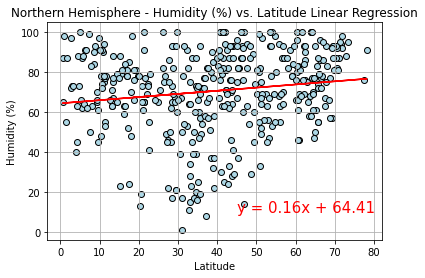

In [14]:
x_values = pd.to_numeric(northern_df['Latitude']).astype(float)
y_values = pd.to_numeric(northern_df['Humidity (%)']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values, facecolors="lightblue", edgecolors="black")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(45,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
plt.grid()


####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

Regression line equation is: y = 0.17x + 74.1
The r-squared is: 0.1164477637214958


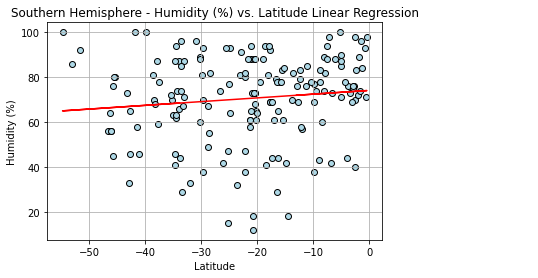

In [15]:
x_values = pd.to_numeric(southern_df['Latitude']).astype(float)
y_values = pd.to_numeric(southern_df['Humidity (%)']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values, facecolors="lightblue", edgecolors="black")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
plt.grid()


####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

Regression line equation is: y = 0.14x + 47.19
The r-squared is: 0.07163057445929452


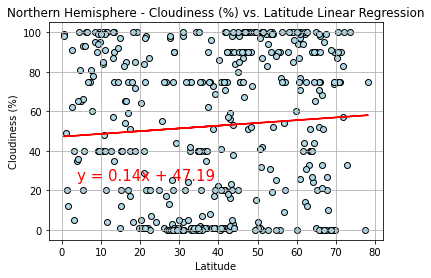

In [16]:
x_values = pd.to_numeric(northern_df['Latitude']).astype(float)
y_values = pd.to_numeric(northern_df['Cloudiness (%)']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values, facecolors="lightblue", edgecolors="black")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(4,25),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
plt.grid()


####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

Regression line equation is: y = 0.35x + 55.81
The r-squared is: 0.13322704138677305


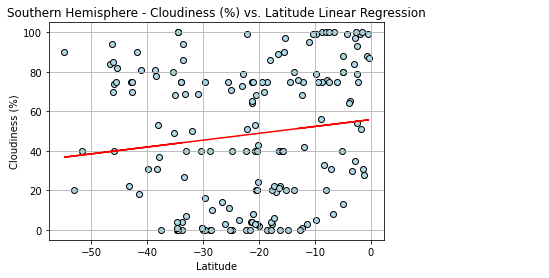

In [17]:
x_values = pd.to_numeric(southern_df['Latitude']).astype(float)
y_values = pd.to_numeric(southern_df['Cloudiness (%)']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values, facecolors="lightblue", edgecolors="black")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
plt.grid()


####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

Regression line equation is: y = 0.02x + 6.69
The r-squared is: 0.09221915443322803


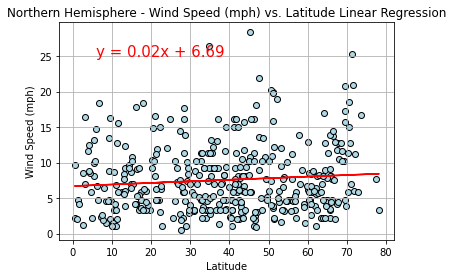

In [18]:
x_values = pd.to_numeric(northern_df['Latitude']).astype(float)
y_values = pd.to_numeric(northern_df['Wind Speed (mph)']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values, facecolors="lightblue", edgecolors="black")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,25),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
plt.grid()


####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

Regression line equation is: y = -0.09x + 6.49
The r-squared is: -0.21946593596200173


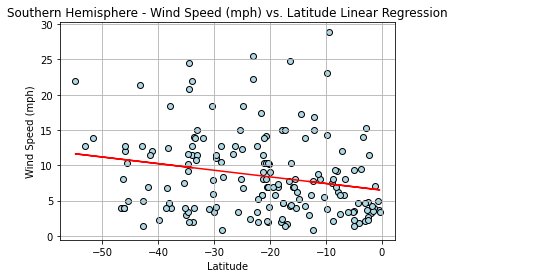

In [19]:
x_values = pd.to_numeric(southern_df['Latitude']).astype(float)
y_values = pd.to_numeric(southern_df['Wind Speed (mph)']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values, facecolors="lightblue", edgecolors="black")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
plt.grid()


In [ ]:
Observable trends based on the data

1. When comparing Northern Hemisphere & Southern Hemisphere "Wind Speed vs. Latitude Linear Regression", Northern Hemispher has an upward trajectory compared to Southern Hemisphere.
2. In Southern Hemisphere, the graph shows no correlation between Cloudiness vs. Latitude Linear Regression.
3. Southern Hemisphere has a positive trajectory on Max Temp compared to Northern Hemisphere.